ｔｒａｎｓｆｅｒ　ｌｅｒａｎｉｎｇ　ｗｉｔｈ　ｔｆ

In [1]:
#encoding=utf-8
from PIL import Image
import matplotlib.pyplot as plt
from datetime import datetime
import os
import numpy as np
import tensorflow as tf
from imp import reload
from tensorflow.python import debug as tf_debug#
from sklearn.utils import shuffle
from helper import DelayedKeyboardInterrupt,read_datasets

os.environ["CUDA_VISIBLE_DEVICES"] = "0"
os.system("nvidia-smi | grep vpython3 | awk '{print $3}' | xargs kill -9")
os.system("lsof -i:6006 | grep tensorboa | awk '{print $2}' | xargs kill -9")
os.system("export TERM=linux ; export TERMINFO=/etc/terminfo")

0

In [2]:
# 读取tfrecords one_hot=false，将测试数据转为ＴＦｒｅｃｏｒｄｓ
# read_datasets(2).convert2TFRecord_test()

In [3]:
# debug = True

iterations=1000
batch_size = 128
learning_rate = 0.01#和初始化的权重很重要，直接关系你预测起始值
train_epochs=100
test_epochs=1
init_stddev=0.1
display_step=10

samples_channels = 3
one_hot_num = 3
height = width = 200
tarin_samples_num=4170

layer1_output_num = 8
layer2_output_num = 16
layer3_output_num = 32
layer4_output_num = 64
strides = [1, 1, 1, 1]
ksize = [1, 2, 2, 1]
fsize = 3

cost_list = []
corr_rate_list = []

In [4]:
output_dir="/home/naruto/PycharmProjects/knifey_spoony_demo/data/output"
ckpt_dir = "./ckpt_dir"
if not os.path.exists(ckpt_dir):
    os.makedirs(ckpt_dir)

def init_weights(shape):
    return tf.Variable(tf.random_normal(shape, stddev=init_stddev))#很重要

reading TFRecords file is done!
reading TFRecords file is done!
./ckpt_dir/model.ckpt-999
INFO:tensorflow:Restoring parameters from ./ckpt_dir/model.ckpt-999
after 10 iteration ,the cost values is   0.0000,the  corr_rate is   1.0000
after 10 iteration ,the test  coss  is   0.0000,test corr_tate is   1.0000
the train time:7 seconds
after 20 iteration ,the cost values is  85.9317,the  corr_rate is   0.8594
after 20 iteration ,the test  coss  is 261.6889,test corr_tate is   0.7656
the train time:10 seconds
after 30 iteration ,the cost values is 133.7401,the  corr_rate is   0.4219
after 30 iteration ,the test  coss  is 131.5628,test corr_tate is   0.2656
the train time:13 seconds
after 40 iteration ,the cost values is  56.8760,the  corr_rate is   0.9922
after 40 iteration ,the test  coss  is  12.3726,test corr_tate is   0.9922
the train time:17 seconds
after 50 iteration ,the cost values is 129.7622,the  corr_rate is   0.3438
after 50 iteration ,the test  coss  is 128.5026,test corr_tate i

after 470 iteration ,the cost values is  62.9213,the  corr_rate is   0.8750
after 470 iteration ,the test  coss  is  47.5861,test corr_tate is   0.9219
the train time:188 seconds
after 480 iteration ,the cost values is  35.9946,the  corr_rate is   0.9141
after 480 iteration ,the test  coss  is  35.6547,test corr_tate is   0.8984
the train time:192 seconds
after 490 iteration ,the cost values is  60.5620,the  corr_rate is   0.8438
after 490 iteration ,the test  coss  is  33.1398,test corr_tate is   0.9062
the train time:197 seconds
after 500 iteration ,the cost values is  46.3824,the  corr_rate is   0.9141
after 500 iteration ,the test  coss  is  29.5301,test corr_tate is   0.9453
the train time:201 seconds
after 510 iteration ,the cost values is  45.4639,the  corr_rate is   0.9141
after 510 iteration ,the test  coss  is  27.0252,test corr_tate is   0.9609
the train time:205 seconds
after 520 iteration ,the cost values is  21.9026,the  corr_rate is   0.9297
after 520 iteration ,the test

after 930 iteration ,the cost values is   6.4758,the  corr_rate is   0.9922
after 930 iteration ,the test  coss  is   6.4938,test corr_tate is   0.9844
the train time:399 seconds
after 940 iteration ,the cost values is  10.8251,the  corr_rate is   0.9688
after 940 iteration ,the test  coss  is   0.1835,test corr_tate is   1.0000
the train time:404 seconds
after 950 iteration ,the cost values is   1.6666,the  corr_rate is   0.9922
after 950 iteration ,the test  coss  is   1.5512,test corr_tate is   0.9922
the train time:409 seconds
after 960 iteration ,the cost values is  14.4502,the  corr_rate is   0.9531
after 960 iteration ,the test  coss  is   0.6577,test corr_tate is   1.0000
the train time:414 seconds
after 970 iteration ,the cost values is   1.2314,the  corr_rate is   1.0000
after 970 iteration ,the test  coss  is  10.0942,test corr_tate is   0.9844
the train time:418 seconds
after 980 iteration ,the cost values is   3.4975,the  corr_rate is   0.9844
after 980 iteration ,the test

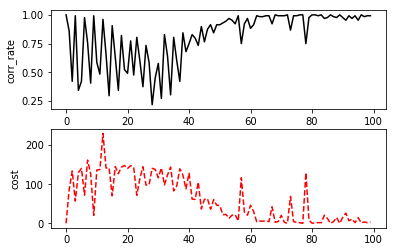

In [5]:
#session一定要包含在这个Graph中
with tf.Graph().as_default():
    is_training = tf.placeholder(dtype=tf.bool, shape=())
    global_step = tf.Variable(0, name='global_step', trainable=False)
    saver = tf.train.Saver()
    # writer = tf.summary.FileWriter(output_dir)
    # merge = tf.summary.merge_all()
    train_images_, train_labels_ = read_datasets(num_epoch=train_epochs).read_and_decode()
    test_images_ , test_labels_  = read_datasets(num_epoch=test_epochs).read_and_decode()
    # train_images_：[200, 200, 3]
    # train_labels_:() 都是tensor
    # print(tf.Tensor.get_shape(train_images_))
    # Image.fromarray(np.reshape(np.matrix(train_images_.eval())[0])).show()
    train_images, train_labels = tf.train.shuffle_batch([train_images_, train_labels_], batch_size=batch_size, num_threads=2,capacity=2000,min_after_dequeue=500)
    test_images, test_labels = tf.train.shuffle_batch([test_images_, test_labels_], batch_size=batch_size, num_threads=2,capacity=500,min_after_dequeue=256)
    # train_images：【256,200,200,3】
    # parse_labels：(256,)
    # min_after_dequeue：越大shuffle力度越大
    # 不是线程越多越快，甚至更多的线程反而会使效率下降。
    # Ensures a minimum amount of shuffling of examples.
    # image = tf.image.resize_image_with_crop_or_pad(image, image_W, image_H)    #
    # image = tf.image.per_image_standardization(image)

    # # 随机裁剪大小
    # distorted_image = tf.random_crop(tf.cast(image, tf.float32), [IMAGE_SIZE, IMAGE_SIZE, 3])
    # # 随机水平翻转
    # distorted_image = tf.image.random_flip_left_right(distorted_image)
    # # 随机调整亮度
    # distorted_image = tf.image.random_brightness(distorted_image, max_delta=63)
    # # 随机调整对比度
    # distorted_image = tf.image.random_contrast(distorted_image, lower=0.2, upper=1.8)
    # # 对图像进行白化操作，即像素值转为零均值单位方差
    # float_image = tf.image.per_image_standardization(distorted_image)

#dropout ，fc的relu解决梯度被relu激活过大，导致训练一会后损失不变，预测值都为0
    DROPOUT=tf.constant(0.75)
    layer1_w = init_weights([fsize, fsize, samples_channels , layer1_output_num])
    layer2_w = init_weights([fsize, fsize, layer1_output_num, layer2_output_num])
    layer3_w = init_weights([fsize, fsize, layer2_output_num, layer3_output_num])
    layer4_w = init_weights([fsize,fsize,  layer3_output_num, layer4_output_num])
    fc1_w = init_weights([6400,1024])
    fc2_w = init_weights([1024,128])
    out_w = init_weights([128, one_hot_num])
    #valid不补
    conv1_o = tf.nn.relu(tf.nn.conv2d(train_images, layer1_w, strides, padding='VALID'),name="conv1_o")#x+2=200 198 stride=2 #2x+1<=200
    pool1_o = tf.nn.max_pool(conv1_o, ksize, ksize, padding="VALID",name="pool1_o")  # 99
    conv2_o = tf.nn.relu(tf.nn.conv2d(pool1_o, layer2_w, strides, padding='VALID',name="conv2_o"))#97
    pool2_o = tf.nn.max_pool(conv2_o, ksize, ksize, padding="VALID",name="pool2_o")  # 48
    conv3_o = tf.nn.relu(tf.nn.conv2d(pool2_o, layer3_w, strides, padding='VALID',name="conv3_o"))#46
    pool3_o = tf.nn.max_pool(conv3_o, ksize, ksize, padding="VALID",name="pool3_o")  # 23
    conv4_o = tf.nn.relu(tf.nn.conv2d(pool3_o, layer4_w, strides, padding='VALID',name="conv4_o"))#21
    pool4_o = tf.nn.max_pool(conv4_o, ksize, ksize, padding="VALID",name="pool4_o")  # 10*10*64
    pool4_o = tf.reshape(pool4_o, shape=[-1, 64*10*10])

    fc_1 = tf.nn.relu(tf.matmul(pool4_o, fc1_w))
    fc_1 = tf.nn.dropout(fc_1,DROPOUT)
    fc_2 = tf.nn.relu(tf.matmul(fc_1,fc2_w))
    fc_2 = tf.nn.dropout(fc_2,DROPOUT)

    output=tf.matmul(fc_2,out_w)
    train_labels_onehot=tf.one_hot(indices=train_labels, depth=one_hot_num, on_value=1, off_value=0)
    # cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=fc_1, labels=train_labels))
    #sparse时传递是一个值，本实验中一直报错

    with tf.name_scope("cost"):
        cost = tf.reduce_sum(tf.nn.softmax_cross_entropy_with_logits(logits=output, labels=train_labels_onehot))
        tf.summary.scalar("cost",cost)

    optimezer = tf.train.RMSPropOptimizer(learning_rate, 0.9).minimize(cost)
    # optimezer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

    with tf.name_scope("corr_rate"):
        corr_rate=tf.reduce_mean(tf.cast(tf.equal(tf.argmax(output,1),tf.argmax(train_labels_onehot,1)),tf.float32))
        tf.summary.scalar("corr_rate",corr_rate)

    with tf.Session() as sess:
        start = datetime.now()
        x = tf.cond(is_training, lambda: train_images, lambda: test_images)
        y = tf.cond(is_training, lambda: train_labels, lambda: test_labels)
        writer = tf.summary.FileWriter(output_dir)
        merge = tf.summary.merge_all()
        tf.global_variables_initializer().run()
        ckpt = tf.train.get_checkpoint_state(ckpt_dir)
        if ckpt and ckpt.model_checkpoint_path:
            print(ckpt.model_checkpoint_path)
            saver.restore(sess, ckpt.model_checkpoint_path)  # restore all variables

        # start = global_step.eval()  # get last global_step
        # print("Start from:", start)
        # if debug:
        init_op = tf.group(tf.global_variables_initializer(), tf.local_variables_initializer())
        sess.run(init_op)
        # 调试
        # sess = tf_debug.LocalCLIDebugWrapperSession(sess)
        # sess.add_tensor_filter("has_inf_or_nan", tf_debug.has_inf_or_nan)

        # Coordinator类可以用来同时停止多个工作线程并且向那个在等待所有工作线程终止的程序报告异常。
        # QueueRunner类用来协调多个工作线程同时将多个tensor压入同一个队列中。
        coord = tf.train.Coordinator()#创建一个协调器，管理线程
        threads = tf.train.start_queue_runners(coord=coord)#启动所有的QueueRunner
        # enqueue_threads = tf.train.create_threads(sess, coord=coord, start=True)
        try:
          for step in range(iterations):
              if coord.should_stop():
                  break
              STEP,summary,pre, _, COST, CORR_RATE = sess.run([global_step.assign(step),merge,output, optimezer, cost, corr_rate], {is_training :True})
              # TIME = (datetime.now() - start).seconds 这里定义起始时间不管用，最终结果batch time都是0
              # global_step.assign(step).eval()  # set and update(eval) global_step with index, i
              saver.save(sess, ckpt_dir + "/model.ckpt", global_step=STEP)
              if  (step+1)% display_step == 0:
                  # STEP,test_cost, test_corr_rate = sess.run(
                  #     [global_step.assign(step), cost, corr_rate], {is_training: False})
                  # test_start = datetime.now()

                  test_cost, test_corr_rate = sess.run(
                      [cost, corr_rate], {is_training: False})
                  #不同的tensor显示方法
                  # print("the predict values is {}".format(output.eval()))
                  # print("the true values is {}".format(tf.Tensor.eval(train_labels)))
                  print("after %s iteration ,the cost values is %8.4f,the  corr_rate is %8.4f"%(step + 1, COST, CORR_RATE))
                  print("after %s iteration ,the test  coss  is %8.4f,test corr_tate is %8.4f"%(step+1, test_cost,test_corr_rate))
                  TIME = (datetime.now() - start).seconds
                  print("the train time:{} seconds".format(TIME))
                  cost_list.append(COST)
                  corr_rate_list.append(CORR_RATE)
                  writer.add_summary(summary,step)
                  # writer.add_summary(step,COST)
                  # writer.add_summary(step,CORR_RATE)
        except tf.errors.OutOfRangeError:
          print('OutOfRangeError ')
          print("after {} iteration ,the coss values is {},the corr_rate is {}".format(step+1, COST, CORR_RATE))

        finally:
          # When done, ask the threads to stop.
          TIME = (datetime.now() - start).seconds
          print("the train time:{} seconds".format(TIME))
          print(" training done;after {} iteration ,{} epochs,the coss values is {},the corr_rate is {}".format(step+1,(step+1)*batch_size//tarin_samples_num, COST, CORR_RATE))

          # timestamp = str(datetime.date(datetime.now()))
          timestamp=datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
          np.save(output_dir+timestamp + "_cost_lst.npy", cost_list)
          np.save(output_dir+timestamp + "_corr_rate.npy", corr_rate_list)
          # plt.plot(cost_list)
          plt.figure(1)
          plt.subplot(211)
          plt.title("")
          plt.ylabel('corr_rate')
          plt.plot(corr_rate_list,'k')
          plt.subplot(212)
          plt.title("")
          plt.ylabel('cost')
          plt.plot(cost_list,'r--')
          plt.savefig(output_dir+timestamp+"cost_corr.png")
          # print(cost_list)
          plt.show()
          coord.request_stop()
        # Wait for threads to finish.
        coord.join(threads)
        sess.close()